In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [40]:
df = pd.read_csv("spam-utf.csv")

In [41]:
df.shape

(5572, 5)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


## 1.Data cleaning

In [43]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3' , 'Unnamed: 4'],inplace=True)

In [44]:
df.sample(5)

,v1,v2
709,spam,4mths half price Orange line rental & latest c...
3954,ham,I knew it... U slept v late yest? Wake up so l...
3640,spam,You can stop further club tones by replying \S...
3968,ham,Thanks for your message. I really appreciate y...
978,ham,Hey you can pay. With salary de. Only &lt;#&g...


In [45]:
df.rename(columns={"v1": "target" ,'v2':'text'},inplace=True)
df.sample(5)

,target,text
3275,ham,Lol your right. What diet? Everyday I cheat an...
3649,ham,"We are hoping to get away by 7, from Langport...."
4491,ham,Probably a couple hours tops
4062,ham,How are you. Its been ages. How's abj
2290,ham,"HEY THERE BABE, HOW U DOIN? WOT U UP 2 2NITE L..."


In [46]:
#label encoding
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [47]:
df["target"]=encoder.fit_transform(df["target"])

In [48]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [49]:
df=df.drop_duplicates(keep="first")

In [50]:
df.shape

(5169, 2)

## 2.EDA

In [51]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [52]:
import matplotlib.pyplot as plt

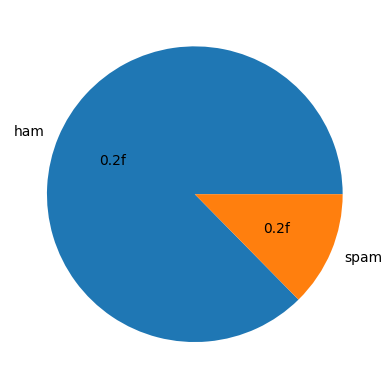

In [53]:
plt.pie(df['target'].value_counts() , labels=['ham' ,'spam'],autopct='0.2f')
plt.show()
#data is imbalance

In [16]:
pip install --upgrade nltk

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [54]:
import nltk

In [55]:
nltk.download("punkt_tab")       #for dependencies

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\work\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [56]:
df["num_characters"] = df['text'].apply(len)         #number of char used

In [57]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [58]:
# num of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [59]:
df['num_sentence']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [60]:
df.describe()

,target,num_characters,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.924163,18.456761,1.966531
std,0.332253,58.175349,13.325633,1.449833
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [61]:
df[df['target'] == 0][['num_characters', 'num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.457263,17.123782,1.820195
std,56.357463,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [62]:
df[df['target'] == 1][['num_characters', 'num_words','num_sentence']].describe()               #spam

,num_characters,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.479326,27.675345,2.978560
std,30.014336,7.011513,1.493185
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


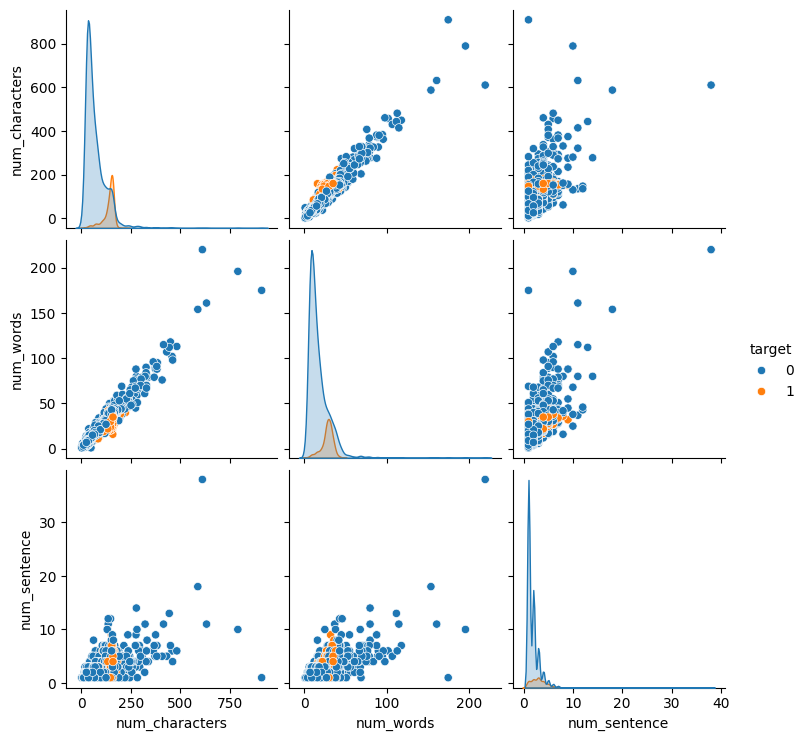

In [63]:
sns.pairplot(df,hue="target")

In [64]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)

    y=[]
    for  i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [67]:
from nltk.corpus import stopwords
stopwords.words("english")

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [69]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [71]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('dancing')

'danc'

In [72]:
transform_text('Hii I am this is dancing % Vaishnavi')

'hii danc vaishnavi'

In [73]:
df['transformed_text']= df['text'].apply(transform_text)


In [ ]:
df.head()

In [ ]:
pip install wordcloud


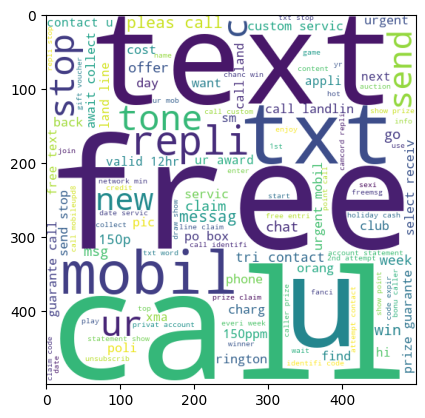

In [76]:
#common words for spam
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')
spam_wc = wc.generate(df[df['target']== 1]['transformed_text'].str.cat(sep=' '))
plt.imshow(spam_wc)

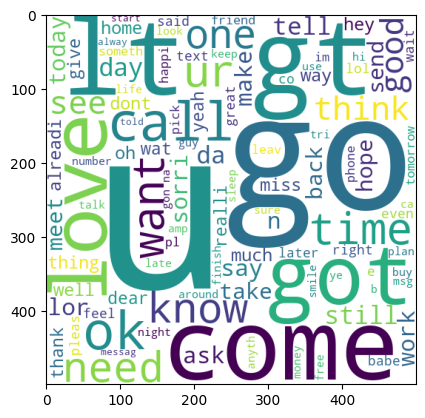

In [75]:
#common words for ham
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')
ham_wc = wc.generate(df[df['target']== 0]['transformed_text'].str.cat(sep=' '))
plt.imshow(ham_wc)

In [78]:
spam_corpus=[]
for msg in df[df['target']==1] ['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [79]:
len(spam_corpus)

9941

<Axes: xlabel='1', ylabel='0'>

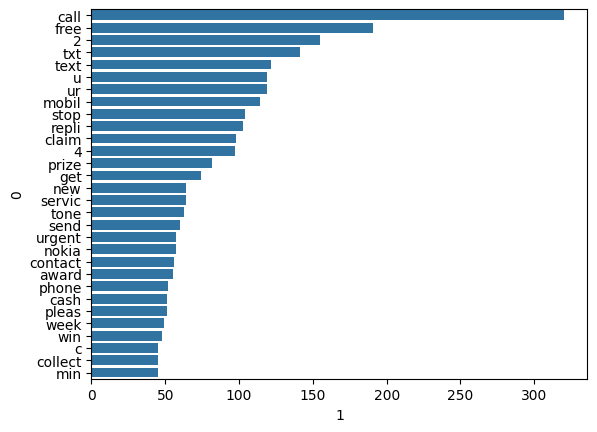

In [80]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[1], 
            y=pd.DataFrame(Counter(spam_corpus).most_common(30))[0])

In [81]:
ham_corpus=[]
for msg in df[df['target']==0] ['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [82]:
len(ham_corpus)

35305

<Axes: xlabel='1', ylabel='0'>

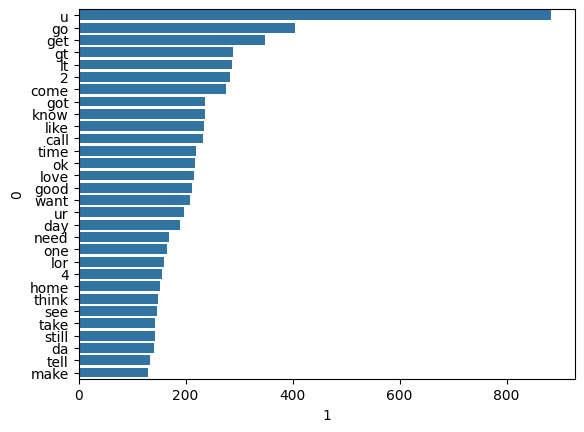

In [83]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[1], 
            y=pd.DataFrame(Counter(ham_corpus).most_common(30))[0])

In [84]:
import sklearn


In [97]:
#Navie bayes algo
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [98]:
X = tfidf.fit_transform(df['transformed_text']).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(5169, 3000))

In [99]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [100]:
from sklearn.model_selection import train_test_split


In [101]:
X_train , X_test ,y_train ,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [106]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score , confusion_matrix ,precision_score

In [107]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [108]:
gnb.fit(X_train,y_train)
y_pred1= gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))


0.8713733075435203
[[788 108]
 [ 25 113]]
0.5113122171945701


In [109]:
mnb.fit(X_train,y_train)
y_pred2= mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.971953578336557
[[896   0]
 [ 29 109]]
1.0


In [105]:
bnb.fit(X_train,y_train)
y_pred3= bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [110]:
#mnb with tfi-df
import pickle 
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))